# 🍎 파이썬 머신러닝 완벽 가이드 

## Kaggle competition: TMDB Box Office Prediction

### 2019.04.13 ~ 2019.04.25

[캐글 TMDB Box Office Prediction](https://www.kaggle.com/c/tmdb-box-office-prediction/notebooks)

- 회귀 / RMSLE(평가방식)


### 데이터 전처리

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [171]:
movie_df = pd.read_csv('data/box_office_train.csv')
movie_df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [172]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords             

In [173]:
movie_df.isnull().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

- id 삭제: index있으니까 id는 필요없음
- belongs_to_collection: 결측치가 많은 데다가 original_title에 정보가 담겨 있으므로 삭제 
- homepage 삭제: 필요없음
- imdb_id 삭제: 필요없음
- original_title 삭제: 필요없음
- overview 삭제: 필요없음
- poster_path 삭제: 필요없음
- tagline 삭제: 필요없음
- title 삭제: 필요없음 
- status 삭제: 필요없을 듯(Rumored가 4개인데 그렇게 큰 영향 받는것 같지 않음) 
- cast, runtime, spoken_language 삭제

In [174]:
movie_df = movie_df.drop(['id', 'homepage', 'title', 'status', 'spoken_languages', 'runtime',
                          'imdb_id','original_title','overview','poster_path',
                         'tagline'],1)
movie_df.head()

,belongs_to_collection,budget,genres,original_language,popularity,production_companies,production_countries,release_date,Keywords,cast,crew,revenue
0,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",en,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",en,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",hi,3.174936,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",ko,1.148070,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


### 인코딩과 로그변환

In [145]:
# 원-핫 인코딩 시켜주기 
movie_df_ohe = pd.get_dummies(movie_df)

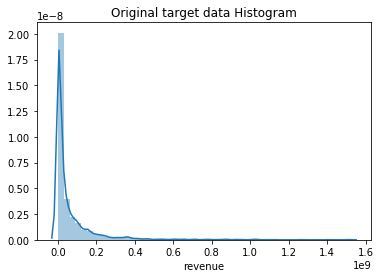

In [12]:
plt.title('Original target data Histogram')
sns.distplot(movie_df['revenue']) # 포아송 분포(?)니까 로그변환 시켜줘야겠군. 

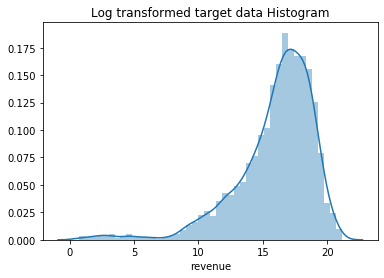

In [13]:
log_revenue = np.log1p(movie_df['revenue'])
plt.title('Log transformed target data Histogram')
sns.distplot(log_revenue) # 쏠리긴 했지만 그래도 나아졌음. 

### 평가 함수 만들기

In [162]:
from sklearn.metrics import mean_squared_error

def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test , pred)
    rmse = np.sqrt(mse)
    print('{0} 로그 변환된 RMSE: {1}'.format(model.__class__.__name__,np.round(rmse, 3)))
    return rmse

def get_rmses(models):
    rmses = [ ]
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

### 학습/예측 모델

In [167]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split

X_features = movie_df_ohe.drop('revenue',1)
y_target = log_revenue

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, 
                                                   test_size = 0.2, random_state=156)

In [169]:
rf_reg = RandomForestRegressor(n_estimators=100)
rf_reg.fit(X_train, y_train)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

models = [rf_reg, lr_reg, ridge_reg, lasso_reg]

/Users/harampark/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.00408e-19): result may not be accurate.
  overwrite_a=True).T


budget / original_language / popularity	
이 세개의 컬럼만 남겼을 때,

In [163]:
# 로그 변환 값에 rmse를 하면, rmsle로 평가됨! 
get_rmse(rf)  

RandomForestRegressor 로그 변환된 RMSE: 2.541


2.54054417377396

In [170]:
get_rmses(models)

RandomForestRegressor 로그 변환된 RMSE: 2.524
LinearRegression 로그 변환된 RMSE: 2.71
Ridge 로그 변환된 RMSE: 2.703
Lasso 로그 변환된 RMSE: 2.699


[2.523612353040881, 2.7101655978355104, 2.702882995427752, 2.6988410484003946]